# Procesado de Datos

Year 2000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run -i ../tools/functions.py
%run -i ../tools/label_encoder.py

Charge the file with the data, into a DataFrame

In [2]:
data_2000 = pd.read_csv("../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/SB11-20001-RGSTRO-CLFCCN-V1-0.txt", delimiter="|",
                        encoding="iso-8859-1")

/usr/local/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,12,14,15,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_2000.shape

(77626, 57)

In [4]:
data_2000.head(3).T

,0,1,2
ESTU_CONSECUTIVO,SB11200010000203,SB11200010000204,SB11200010000205
COLE_COD_ICFES,83048,3327,19364
COLE_NOMBRE_SEDE,INSTITUTO STUDIUM,COLEGIO HEBREO UNION,COLEGIO ANGLO COLOMBIANO
IND_ANNO_TERMINO_BACHILLERATO,1999,2000,2000
COLE_JORNADA,C,C,C
COLE_VALOR_PENSION,3,8,7
ESTU_GENERO,F,F,M
ESTU_NACIMIENTO_DIA,19,28,30
ESTU_NACIMIENTO_MES,3,4,4
ESTU_NACIMIENTO_ANNO,1981,1982,1982


In [5]:
print(data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().index)
print(data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_PERSONAS_HOGAR']))

Index(['1', '2', '3', '5', '6', '7', '8', '9', '@'], dtype='object')
1      274
2     2744
3     8917
5    18814
6    11487
7     6493
8     3781
9     2208
@    19122
Name: FAMI_PERSONAS_HOGAR, dtype: int64
Elementos null/NaN 3786
__________________
Elementos diferentes de null/NaN: 73840
__________________
(73840,)
None


The simbol "@" will be changed for the number 4, because the average in Colombian's homes is near to 4.

In [6]:
data_2000['FAMI_PERSONAS_HOGAR'] = data_2000['FAMI_PERSONAS_HOGAR'].replace('@', '4')

Then, the following columns will be reviewed

In [7]:
print(data_2000['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index().index)
print(data_2000['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_VIVIENDA_PROPIA']))

Index(['@', 'N', 'S'], dtype='object')
@        4
N    20144
S    53182
Name: FAMI_VIVIENDA_PROPIA, dtype: int64
Elementos null/NaN 4296
__________________
Elementos diferentes de null/NaN: 73330
__________________
(73330,)
None


There are very few rows with the value "@", so the rows that has it will be replaced for 'NaN' values, and the np.nan values too. 

In [8]:
data_2000['FAMI_VIVIENDA_PROPIA'] = data_2000['FAMI_VIVIENDA_PROPIA'].replace('@', np.nan)

In [9]:
print(data_2000['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index().index)
print(data_2000['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_DEUDA_VIVIENDA']))

Index(['@', 'N', 'S'], dtype='object')
@        3
N    36147
S    11464
Name: FAMI_DEUDA_VIVIENDA, dtype: int64
Elementos null/NaN 30012
__________________
Elementos diferentes de null/NaN: 47614
__________________
(47614,)
None


In [10]:
data_2000['FAMI_DEUDA_VIVIENDA'] = data_2000['FAMI_DEUDA_VIVIENDA'].replace('@', np.nan)

In [11]:
print(data_2000['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_LEE_ESCRIBE_PADRE']))

Index(['@', 'N', 'S'], dtype='object')
@       35
N     2264
S    67427
Name: FAMI_LEE_ESCRIBE_PADRE, dtype: int64
Elementos null/NaN 7900
__________________
Elementos diferentes de null/NaN: 69726
__________________
(69726,)
None


In [12]:
data_2000['FAMI_LEE_ESCRIBE_PADRE'] = data_2000['FAMI_LEE_ESCRIBE_PADRE'].replace('@', np.nan)

In [13]:
print(data_2000['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_LEE_ESCRIBE_MADRE']))

Index(['@', 'N', 'S'], dtype='object')
@       43
N     2847
S    72004
Name: FAMI_LEE_ESCRIBE_MADRE, dtype: int64
Elementos null/NaN 2732
__________________
Elementos diferentes de null/NaN: 74894
__________________
(74894,)
None


In [14]:
data_2000['FAMI_LEE_ESCRIBE_MADRE'] = data_2000['FAMI_LEE_ESCRIBE_MADRE'].replace('@', np.nan)

In [15]:
print(data_2000['FAMI_SOST_PERSONAL'].value_counts().sort_index().index)
print(data_2000['FAMI_SOST_PERSONAL'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_SOST_PERSONAL']))

Index(['@', 'N', 'P', 'T'], dtype='object')
@        3
N     6586
P    10348
T    57627
Name: FAMI_SOST_PERSONAL, dtype: int64
Elementos null/NaN 3062
__________________
Elementos diferentes de null/NaN: 74564
__________________
(74564,)
None


In [16]:
data_2000['FAMI_SOST_PERSONAL'] = data_2000['FAMI_SOST_PERSONAL'].replace('@', np.nan)

In [17]:
print(data_2000['ESTU_TRABAJA'].value_counts().sort_index().index)
print(data_2000['ESTU_TRABAJA'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_TRABAJA']))

Index(['@', 'N', 'S'], dtype='object')
@        2
N    63214
S    10620
Name: ESTU_TRABAJA, dtype: int64
Elementos null/NaN 3790
__________________
Elementos diferentes de null/NaN: 73836
__________________
(73836,)
None


In [18]:
data_2000['ESTU_TRABAJA'] = data_2000['ESTU_TRABAJA'].replace('@', np.nan)

In [19]:
print(data_2000['COLE_CALENDARIO'].value_counts().sort_index().index)
print(data_2000['COLE_CALENDARIO'].value_counts().sort_index())
print(missing_data(data_2000['COLE_CALENDARIO']))

Index(['A', 'B', 'F'], dtype='object')
A     6708
B    49464
F    21454
Name: COLE_CALENDARIO, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [20]:
print(data_2000['COLE_CARACTER'].value_counts().sort_index().index)
print(data_2000['COLE_CARACTER'].value_counts().sort_index())
print(missing_data(data_2000['COLE_CARACTER']))

Index(['ACADEMICO', 'ACADEMICO Y TECNICO', 'NORMALISTA', 'TECNICO'], dtype='object')
ACADEMICO              38234
ACADEMICO Y TECNICO    17844
NORMALISTA              1168
TECNICO                20380
Name: COLE_CARACTER, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [21]:
remaining_c = data_2000.columns.difference(['FAMI_PERSONAS_HOGAR', 'FAMI_VIVIENDA_PROPIA', 'FAMI_DEUDA_VIVIENDA', 'FAMI_LEE_ESCRIBE_PADRE',
                     'FAMI_LEE_ESCRIBE_MADRE', 'FAMI_SOST_PERSONAL', 'ESTU_TRABAJA', 'COLE_CALENDARIO',
                     'COLE_CARACTER'])

In [22]:
remaining_c

Index(['COD_IDIOMA', 'COD_INTERDISCIPLINAR', 'COLE_BILINGUE', 'COLE_COD_ICFES',
       'COLE_DEPTO_UBICACION', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION',
       'COLE_NOMBRE_SEDE', 'COLE_VALOR_PENSION', 'ESTU_ACT_PROX_ANNO',
       'ESTU_CARRDESEADA_COD', 'ESTU_CARRDESEADA_RAZON', 'ESTU_CONSECUTIVO',
       'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'ESTU_IES_COD_DESEADA',
       'ESTU_LIMITA_INVIDENTE', 'ESTU_LIMITA_MOTRIZ',
       'ESTU_LIMITA_SORDOINTERPRETE', 'ESTU_LIMITA_SORDONOINTERPRETE',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_NACIMIENTO_ANNO',
       'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_MES', 'ESTU_RAZONINSTITUTO',
       'ESTU_RESIDE_DEPTO', 'ESTU_RESIDE_MCPIO', 'ESTU_TIPO_DOCUMENTO',
       'FAMI_APORTANTES', 'FAMI_EDUCA_MADRE', 'FAMI_EDUCA_PADRE',
       'FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_NUM_HERMANOS',
       'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'FAMI_OCUPA_MADRE', 'FAMI_OCUPA_PADRE',
       'FAMI_POSICION_HERMANOS', 'IND_ANNO_TERMINO_BACHILLERATO',
       'PUNT_BIOLOGIA', '

In [23]:
print(data_2000['ESTU_CARRDESEADA_RAZON'].value_counts().index)
print(data_2000['ESTU_CARRDESEADA_RAZON'].value_counts())
print(missing_data(data_2000['ESTU_CARRDESEADA_RAZON']))

Index(['1', '3', '2', '5', '4', 3.0, 1.0, 2.0, '6', 4.0, 5.0, 6.0, '@'], dtype='object')
1      17543
3      14623
2      13583
5       4933
4       4571
3.0     4537
1.0     4537
2.0     3898
6       1658
4.0     1078
5.0     1075
6.0      381
@         18
Name: ESTU_CARRDESEADA_RAZON, dtype: int64
Elementos null/NaN 5191
__________________
Elementos diferentes de null/NaN: 72435
__________________
(72435,)
None


In [24]:
data_2000['ESTU_CARRDESEADA_RAZON'] = data_2000['ESTU_CARRDESEADA_RAZON'].replace('@', np.nan)
for i in data_2000['ESTU_CARRDESEADA_RAZON'].value_counts().index:
    if type(i) == float:
        data_2000['ESTU_CARRDESEADA_RAZON'] = data_2000['ESTU_CARRDESEADA_RAZON'].replace(i, str(i)[:-2])

In [25]:
print(data_2000['ESTU_RAZONINSTITUTO'].value_counts().index)
print(data_2000['ESTU_RAZONINSTITUTO'].value_counts())
print(missing_data(data_2000['ESTU_RAZONINSTITUTO']))

Index(['2', '3', '5', '8', '4', '6', 2.0, '7', 3.0, 8.0, 5.0, 4.0, 6.0, '1',
       7.0, 1.0, '@'],
      dtype='object')
2      15413
3       9103
5       7725
8       6352
4       6253
6       5142
2.0     5042
7       3861
3.0     2478
8.0     1757
5.0     1510
4.0     1379
6.0     1316
1       1134
7.0     1058
1.0      263
@         16
Name: ESTU_RAZONINSTITUTO, dtype: int64
Elementos null/NaN 7824
__________________
Elementos diferentes de null/NaN: 69802
__________________
(69802,)
None


In [26]:
data_2000['ESTU_RAZONINSTITUTO'] = data_2000['ESTU_RAZONINSTITUTO'].replace('@',np.nan)
for i in data_2000['ESTU_RAZONINSTITUTO'].value_counts().index:
    if type(i) == float:
        data_2000['ESTU_RAZONINSTITUTO'] = data_2000['ESTU_RAZONINSTITUTO'].replace(i, str(i)[:-2])

In [27]:
print(data_2000['COLE_VALOR_PENSION'].value_counts().index)
print(data_2000['COLE_VALOR_PENSION'].value_counts())
print(missing_data(data_2000['COLE_VALOR_PENSION']))

Index(['1', '8', '2', 1.0, '3', '4', 8.0, '7', '5', 2.0, 3.0, 4.0, '6', 5.0,
       6.0, 7.0, '@'],
      dtype='object')
1      17641
8      14402
2       9159
1.0     5909
3       5850
4       3106
8.0     2843
7       2750
5       2009
2.0     1898
3.0     1824
4.0     1367
6       1341
5.0     1217
6.0      488
7.0      296
@         16
Name: COLE_VALOR_PENSION, dtype: int64
Elementos null/NaN 5510
__________________
Elementos diferentes de null/NaN: 72116
__________________
(72116,)
None


Cambio de la @ por 4 en la columna *ESTU_ACT_PROX_ANNO*

In [28]:
data_2000['COLE_VALOR_PENSION'] = data_2000['COLE_VALOR_PENSION'].replace('@', np.nan)
for i in data_2000['COLE_VALOR_PENSION'].value_counts().index:
    if type(i) == str:
        data_2000['COLE_VALOR_PENSION'] = data_2000['COLE_VALOR_PENSION'].replace(i, float(i))

In [29]:
print(data_2000['COLE_DEPTO_UBICACION'].value_counts().sort_index().index)
print(data_2000['COLE_DEPTO_UBICACION'].value_counts().sort_index())
print(missing_data(data_2000['COLE_DEPTO_UBICACION']))

Index(['ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA', 'BOLIVAR', 'BOYACA',
       'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA',
       'CUNDINAMARCA', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIO',
       'NORTE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SANTANDER',
       'SUCRE', 'TOLIMA', 'VALLE'],
      dtype='object')
ANTIOQUIA           3808
ARAUCA               110
ATLANTICO           1098
BOGOTA              6843
BOLIVAR              325
BOYACA               214
CALDAS               317
CAQUETA              250
CASANARE             132
CAUCA               8276
CESAR                181
CHOCO                 57
CORDOBA              328
CUNDINAMARCA         838
HUILA                514
LA GUAJIRA           191
MAGDALENA            175
META                 417
NARIO             11600
NORTE SANTANDER      385
PUTUMAYO             113
QUINDIO              528
RISARALDA            533
SANTANDER            564
SUCRE                 66
TOLIMA       

In [30]:
data_2000['COLE_DEPTO_UBICACION'] = data_2000['COLE_DEPTO_UBICACION'].replace('NARI\x84O', 'NARIÑO')

In [31]:
print(data_2000['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index().index)
print(data_2000['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_DEPTO_PRESENTACION']))

Index(['ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA', 'BOLIVAR', 'BOYACA',
       'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA',
       'CUNDINAMARCA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META',
       'NARIO', 'NORTE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA',
       'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE'],
      dtype='object')
ANTIOQUIA           3794
ARAUCA               108
ATLANTICO           1103
BOGOTA              6857
BOLIVAR              321
BOYACA               249
CALDAS               312
CAQUETA              261
CASANARE             131
CAUCA               8332
CESAR                182
CHOCO                 57
CORDOBA              332
CUNDINAMARCA         808
GUAVIARE              28
HUILA                498
LA GUAJIRA           192
MAGDALENA            175
META                 391
NARIO             11616
NORTE SANTANDER      387
PUTUMAYO             126
QUINDIO              541
RISARALDA            548
SANTANDER            530
S

In [32]:
data_2000['ESTU_DEPTO_PRESENTACION'] = data_2000['ESTU_DEPTO_PRESENTACION'].replace('NARI\x84O', 'NARIÑO')

In [33]:
print(data_2000['ESTU_ACT_PROX_ANNO'].value_counts().sort_index().index)
print(data_2000['ESTU_ACT_PROX_ANNO'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_ACT_PROX_ANNO']))

Index(['1', '2', '3', '@'], dtype='object')
1    19322
2     1917
3    55913
@       46
Name: ESTU_ACT_PROX_ANNO, dtype: int64
Elementos null/NaN 428
__________________
Elementos diferentes de null/NaN: 77198
__________________
(77198,)
None


In [34]:
"""The simbol @ will be replaced for the number(string) 4."""
data_2000['ESTU_ACT_PROX_ANNO'] = data_2000['ESTU_ACT_PROX_ANNO'].replace('@', '4')

Se eliminan las lineas que tienen años invalidos

In [35]:
print(data_2000['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index)
print(data_2000['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_NACIMIENTO_ANNO']))

Float64Index([ 195.0,  196.0,  197.0,  198.0, 1934.0, 1935.0, 1937.0, 1938.0,
              1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0,
              1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0,
              1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0,
              1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0,
              1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0,
              1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0,
              1987.0, 1988.0, 1989.0],
             dtype='float64')
195.0         2
196.0        13
197.0        14
198.0        70
1934.0        1
1935.0        1
1937.0        1
1938.0        4
1939.0        4
1940.0        5
1941.0        3
1942.0        7
1943.0        1
1944.0        3
1945.0        9
1946.0        8
1947.0       14
1948.0       10
1949.0       33
1950.0       27
1951.0       45
1952.0       45
1953.0       51
1954.0       70
1

In [36]:
print(data_2000['ESTU_NACIMIENTO_DIA'].value_counts().sort_index().index)
print(data_2000['ESTU_NACIMIENTO_DIA'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_NACIMIENTO_DIA']))

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
              23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0],
             dtype='float64')
1.0     2844
2.0     2589
3.0     2612
4.0     2506
5.0     2739
6.0     2449
7.0     2515
8.0     2590
9.0     2533
10.0    2654
11.0    2548
12.0    2593
13.0    2408
14.0    2561
15.0    2669
16.0    2486
17.0    2573
18.0    2589
19.0    2496
20.0    2631
21.0    2426
22.0    2486
23.0    2535
24.0    2655
25.0    2597
26.0    2481
27.0    2449
28.0    2592
29.0    2231
30.0    2259
31.0    1312
Name: ESTU_NACIMIENTO_DIA, dtype: int64
Elementos null/NaN 18
__________________
Elementos diferentes de null/NaN: 77608
__________________
(77608,)
None


In [37]:
print(data_2000['ESTU_NACIMIENTO_MES'].value_counts().sort_index().index)
print(data_2000['ESTU_NACIMIENTO_MES'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_NACIMIENTO_MES']))

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], dtype='float64')
1.0     6419
2.0     5792
3.0     6483
4.0     6170
5.0     6492
6.0     6267
7.0     6555
8.0     6571
9.0     6867
10.0    6825
11.0    6500
12.0    6667
Name: ESTU_NACIMIENTO_MES, dtype: int64
Elementos null/NaN 18
__________________
Elementos diferentes de null/NaN: 77608
__________________
(77608,)
None


In [38]:
for i in data_2000['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index:
    if len(str(i)[:-2])<4:
        data_2000['ESTU_NACIMIENTO_ANNO'] = data_2000['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)

Se hacen los cambios segun la columna FAMI_APORTANTES

In [39]:
print(data_2000['FAMI_APORTANTES'].value_counts().sort_index().index)
print(data_2000['FAMI_APORTANTES'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_APORTANTES']))

Index(['+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@'], dtype='object')
+       66
0      251
1    39360
2    28171
3     5815
4     1607
5      483
6      156
7       47
8       30
9       25
@      212
Name: FAMI_APORTANTES, dtype: int64
Elementos null/NaN 1403
__________________
Elementos diferentes de null/NaN: 76223
__________________
(76223,)
None


In [40]:
data_2000['FAMI_APORTANTES'] = data_2000['FAMI_APORTANTES'].replace('@', np.nan)
data_2000['FAMI_APORTANTES'] = data_2000['FAMI_APORTANTES'].replace('+', '+9')

Se eliminan las filas que poseen '@' FAMI_EDUCA_MADRE

In [41]:
print(data_2000['FAMI_EDUCA_MADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_EDUCA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_EDUCA_MADRE']))

Index(['1', '2', '3', '4', '5', '6', '7', '8', '@'], dtype='object')
1     3250
2      936
3    34447
4    19198
5     3962
6     2339
7     4973
8     2039
@      886
Name: FAMI_EDUCA_MADRE, dtype: int64
Elementos null/NaN 5596
__________________
Elementos diferentes de null/NaN: 72030
__________________
(72030,)
None


In [42]:
data_2000['FAMI_EDUCA_MADRE'] = data_2000['FAMI_EDUCA_MADRE'].replace('@', np.nan)

Se eliminan las filas que poseen '@' en FAMI_EDUCA_PADRE

In [43]:
print(data_2000['FAMI_EDUCA_PADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_EDUCA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_EDUCA_PADRE']))

Index(['1', '2', '3', '4', '5', '6', '7', '8', '@'], dtype='object')
1     3122
2      841
3    31984
4    16489
5     3121
6     2895
7     5877
8     3023
@      880
Name: FAMI_EDUCA_PADRE, dtype: int64
Elementos null/NaN 9394
__________________
Elementos diferentes de null/NaN: 68232
__________________
(68232,)
None


In [44]:
data_2000['FAMI_EDUCA_PADRE'] = data_2000['FAMI_EDUCA_PADRE'].replace('@', np.nan)

In [45]:
print(data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index().index)
print(data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_INGRESO_FMILIAR_MENSUAL']))

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@'], dtype='object')
0    18391
1    29605
2    13103
3     6760
4     2677
5     1237
6      940
7      561
8      550
9     1692
@       40
Name: FAMI_INGRESO_FMILIAR_MENSUAL, dtype: int64
Elementos null/NaN 2070
__________________
Elementos diferentes de null/NaN: 75556
__________________
(75556,)
None


In [46]:
data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'] = data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'].replace('@', np.nan)

In [47]:
print(data_2000['FAMI_NUM_HERMANOS'].value_counts().sort_index().index)
print(data_2000['FAMI_NUM_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_NUM_HERMANOS']))

Index(['+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@'], dtype='object')
+     1991
0     3873
1    15009
2    18138
3    12042
4     7558
5     4911
6     3255
7     2351
8     1672
9     1218
@      216
Name: FAMI_NUM_HERMANOS, dtype: int64
Elementos null/NaN 5392
__________________
Elementos diferentes de null/NaN: 72234
__________________
(72234,)
None


In [48]:
data_2000['FAMI_NUM_HERMANOS'] = data_2000['FAMI_NUM_HERMANOS'].replace('+', '+9')
data_2000['FAMI_NUM_HERMANOS'] = data_2000['FAMI_NUM_HERMANOS'].replace('@', np.nan)

In [49]:
print(data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index().index)
print(data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR']))

Index(['+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@'], dtype='object')
+       71
0    38329
1    18432
2     7448
3     2363
4      899
5      380
6      143
7       76
8       41
9       35
@       82
Name: FAMI_NUM_HERMANOS_EDUSUPERIOR, dtype: int64
Elementos null/NaN 9327
__________________
Elementos diferentes de null/NaN: 68299
__________________
(68299,)
None


In [50]:
#lo mismo que la anterior pero en FAMI_NUM_HERMANOS_EDUSUPERIOR
data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('+', '+9')
data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('@', np.nan)

In [51]:
print(data_2000['FAMI_OCUPA_MADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_OCUPA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_OCUPA_MADRE']))

Index(['0', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '@'],
      dtype='object')
0         1
01      509
02      904
03     1623
04     4035
05     8869
06     6607
07      536
08     4898
09     1200
10    37723
11      310
12     1342
@      1521
Name: FAMI_OCUPA_MADRE, dtype: int64
Elementos null/NaN 7548
__________________
Elementos diferentes de null/NaN: 70078
__________________
(70078,)
None


In [52]:
#se eliminan las filas que poseen el valor '@'
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('0', '0')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('01', '1')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('02', '2')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('03', '3')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('04', '4')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('05', '5')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('06', '6')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('07', '7')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('08', '8')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('09', '9')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('@', np.nan)

In [53]:
print(data_2000['FAMI_OCUPA_PADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_OCUPA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_OCUPA_PADRE']))

Index(['0', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '@'],
      dtype='object')
0         1
01     1312
02     1716
03     3531
04     4447
05    18363
06     8983
07      533
08    16999
09     4535
10      932
11       42
12     1953
@      1786
Name: FAMI_OCUPA_PADRE, dtype: int64
Elementos null/NaN 12493
__________________
Elementos diferentes de null/NaN: 65133
__________________
(65133,)
None


In [54]:
#se eliminan las filas que poseen el valor '@'
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('0', '0')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('01', '1')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('02', '2')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('03', '3')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('04', '4')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('05', '5')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('06', '6')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('07', '7')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('08', '8')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('09', '9')
data_2000['FAMI_OCUPA_PADRE'] = data_2000['FAMI_OCUPA_PADRE'].replace('@', np.nan)

In [55]:
print(data_2000['FAMI_POSICION_HERMANOS'].value_counts().sort_index().index)
print(data_2000['FAMI_POSICION_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_POSICION_HERMANOS']))

Index(['+', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@'], dtype='object')
+      819
1    25279
2    19469
3    11925
4     6252
5     3669
6     2256
7     1463
8     1012
9      698
@       19
Name: FAMI_POSICION_HERMANOS, dtype: int64
Elementos null/NaN 4765
__________________
Elementos diferentes de null/NaN: 72861
__________________
(72861,)
None


In [56]:
#Se eliminan las filas que tienen valores '@' y se cambia '+' por '+10'
data_2000['FAMI_POSICION_HERMANOS'] = data_2000['FAMI_POSICION_HERMANOS'].replace('+', '+9')
data_2000['FAMI_POSICION_HERMANOS'] = data_2000['FAMI_POSICION_HERMANOS'].replace('@', np.nan)

Now i can change the Problematic columns

In [57]:
print(data_2000['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index)
print(data_2000['ESTU_CARRDESEADA_COD'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_CARRDESEADA_COD']))

Index(['0', '0 000', '0000', '00000', '01', '01001', '01101', '0134', '01826',
       '02',
       ...
       '@@0', '@@1', '@@149', '@@4', '@@6', '@@7', '@@9', '@@@', '@@@@9',
       '@@@@@'],
      dtype='object', length=2577)
0         6
0 000     1
0000      1
00000    50
01        3
01001     1
01101     1
0134      1
01826     1
02        1
0206      1
02113     1
02150     1
02823     1
03301     1
04107     1
04108     2
04118     3
04702     2
05        2
05106     1
05210     1
06241     1
0694@     1
0704      1
07953     1
08105     1
1        24
1   0     1
1  0      2
         ..
@3        1
@30       1
@304      1
@30@@     1
@33       1
@3@       1
@4        1
@44       1
@5        1
@5 @      1
@6@       1
@811      1
@8117     1
@839      1
@8@       1
@92       1
@@        9
@@  6     1
@@  9     1
@@ 3      1
@@0       2
@@1       3
@@149     1
@@4       1
@@6       1
@@7       1
@@9       1
@@@       1
@@@@9     1
@@@@@     1
Name: ESTU_CARRDESEADA_COD, dtype: int6

In [58]:
"""Here i'm replacing the values with anomalies for NaN, and i will let the rows that has got any number because the 
codes of the programs are so diverse. And then i will put NaN where the values has some space or np.nan"""
for i in data_2000['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index:
    if '@' in i:
        data_2000['ESTU_CARRDESEADA_COD'] = data_2000['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    elif ' ' in i:
        data_2000['ESTU_CARRDESEADA_COD'] = data_2000['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    elif int(i)==0:
        data_2000['ESTU_CARRDESEADA_COD'] = data_2000['ESTU_CARRDESEADA_COD'].replace(i, np.nan)

In [59]:
print(data_2000['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index)
print(data_2000['ESTU_IES_COD_DESEADA'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_IES_COD_DESEADA']))

Index(['0', '0 01', '0000', '0009', '001', '01', '01 @', '0111', '0123',
       '0129',
       ...
       '@5', '@60', '@71', '@80', '@805', '@83', '@905', '@@', '@@@', '@@@@'],
      dtype='object', length=792)
0       13
0 01     1
0000    45
0009     1
001      3
01       3
01 @     1
0111     1
0123     1
0129     1
01@0     1
0201     5
0203    17
0206     5
0207     1
0208     1
0213     1
0219     1
0248     1
03       5
032      1
0330     1
034@     1
03@      1
04       5
0446     1
0488     1
05       4
0589     2
06       3
        ..
@ 05     1
@ 0@     1
@ 16     2
@ 33     2
@ 80     1
@ @      3
@0       2
@0 8     1
@00      1
@017     1
@03      1
@1       4
@10      1
@11      4
@110     1
@2       3
@203     1
@3       1
@3 0     1
@32      1
@5       1
@60      1
@71      2
@80      1
@805     1
@83      1
@905     1
@@      19
@@@      1
@@@@     9
Name: ESTU_IES_COD_DESEADA, dtype: int64
Elementos null/NaN 6664
__________________
Elementos diferentes de null/NaN:

In [60]:
for i in data_2000['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index:
    if '@' in i:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif ' ' in i:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif int(i)==0:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)<4:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)>4:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)

In [61]:
print(data_2000['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index)
print(data_2000['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index())
print(missing_data(data_2000['IND_ANNO_TERMINO_BACHILLERATO']))

Index(['0 0', '1 99', '19', '1900', '1920', '1960', '1962', '1964', '1967',
       '1968', '1969', '1970', '1972', '1974', '1976', '1977', '1978', '1979',
       '198', '1980', '1981', '1982', '1983', '1984', '1989', '199', '1990',
       '1991', '1995', '1996', '1997', '1998', '1999', '199@', '19@9', '2',
       '2  0', '2 0', '2 00', '20', '20 0', '20**', '20*0', '200', '2000',
       '2001', '2002', '2011', '2020', '2090', '2099', '20@', '20@0', '20@@',
       '2@00', '8316', '9', '99'],
      dtype='object')
0 0         1
1 99        1
19          1
1900       13
1920       15
1960        1
1962        1
1964        1
1967        1
1968        1
1969        5
1970        1
1972        1
1974        1
1976        1
1977        6
1978        4
1979        5
198         2
1980        8
1981        7
1982        3
1983        6
1984        3
1989        2
199         8
1990        1
1991        2
1995        1
1996        1
1997        6
1998       14
1999    16551
199@        2
19@9  

In [62]:
for i in data_2000['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index:
    if '@' in i:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif '*' in i:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif ' ' in i:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif int(i)==0:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif len(i)<4:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif len(i)>4:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif int(i)>2002:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)

Deletion of the selected columns

ELIMINACIONES (se eliminan porque se considera que no aportaran nada a la prediccion)

- ESTU_CONSECUTIVO: Eliminada. no aporta para la prediccion ***ELIMINADA***
- ESTU_LIMITA_SORDOINTERPRETE: No tiene valores en ninguna fila, ***ELIMINADA***

In [63]:
data_2000 = data_2000.drop(['ESTU_LIMITA_SORDOINTERPRETE', 'ESTU_CONSECUTIVO', 'COLE_NOMBRE_SEDE', 'ESTU_TIPO_DOCUMENTO'], axis=1)

## TARGETS

In [64]:
c = 'PUNT_BIOLOGIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([  0,  11,  19,  24,  27,  30,  32,  35,  36,  38,  40,  41,  43,
             44,  46,  47,  48,  50,  51,  52,  54,  55,  56,  58,  59,  60,
             62,  64,  66,  68,  70,  73,  76,  81,  88, 100],
           dtype='int64')
0        25
11       13
19       25
24       74
27      238
30      567
32     1185
35     2207
36     3497
38     4994
40     6265
41     7471
43     8041
44     7888
46     7153
47     6157
48     5074
50     4130
51     3132
52     2389
54     1851
55     1316
56     1084
58      721
59      611
60      445
62      329
64      218
66      190
68      120
70       93
73       72
76       26
81       18
88        6
100       1
Name: PUNT_BIOLOGIA, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [65]:
c = 'PUNT_FILOSOFIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0, 10, 19, 24, 28, 31, 34, 36, 39, 41, 42, 44, 46, 47, 49, 50, 52,
            53, 55, 56, 58, 59, 61, 62, 64, 66, 67, 69, 71, 74, 79],
           dtype='int64')
0      109
10      51
19     107
24     271
28     628
31    1401
34    2588
36    4345
39    6024
41    7608
42    8501
44    8935
46    8315
47    7313
49    5932
50    4688
52    3434
53    2508
55    1694
56    1157
58     774
59     502
61     313
62     198
64     106
66      73
67      23
69      16
71       9
74       2
79       1
Name: PUNT_FILOSOFIA, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [66]:
c = 'PUNT_FISICA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0, 12, 21, 27, 31, 35, 38, 40, 43, 45, 47, 49, 50, 52, 54, 55, 57,
            59, 60, 62, 63, 65, 67, 68, 70, 72, 74, 76, 78, 81, 87],
           dtype='int64')
0        16
12       35
21      228
27      777
31     1976
35     4242
38     7000
40     9456
43    10980
45    10935
47     9568
49     7453
50     5391
52     3418
54     2227
55     1356
57      888
59      592
60      370
62      276
63      153
65      112
67       76
68       41
70       26
72       15
74        9
76        3
78        5
81        1
87        1
Name: PUNT_FISICA, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [67]:
c = 'PUNT_GEOGRAFIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0,  9, 16, 21, 25, 28, 30, 32, 34, 36, 38, 40, 41, 43, 44, 46, 47,
            48, 50, 51, 53, 54, 56, 57, 59, 60, 62, 64, 66, 68, 71, 74],
           dtype='int64')
0       13
9        5
16      13
21      35
25     134
28     327
30     748
32    1382
34    2480
36    3631
38    4941
40    5862
41    6806
43    7257
44    7255
46    6848
47    6270
48    5359
50    4565
51    3847
53    3012
54    2272
56    1722
57    1149
59     773
60     465
62     261
64     123
66      51
68      18
71       1
74       1
Name: PUNT_GEOGRAFIA, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [68]:
c = 'PUNT_HISTORIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0, 11, 18, 22, 26, 28, 31, 33, 34, 36, 38, 39, 41, 42, 43, 45, 46,
            47, 49, 50, 51, 52, 54, 55, 57, 58, 60, 61, 63, 65, 67, 70, 73],
           dtype='int64')
0        8
11       3
18      15
22      49
26     125
28     329
31     716
33    1347
34    2083
36    3204
38    4431
39    5428
41    6165
42    6666
43    6815
45    6652
46    6352
47    5637
49    4842
50    4184
51    3378
52    2644
54    2054
55    1592
57    1043
58     790
60     445
61     324
63     161
65      90
67      41
70      10
73       3
Name: PUNT_HISTORIA, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [69]:
c = 'PUNT_IDIOMA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0, 14, 21, 25, 26, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42,
            43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
            63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 79, 81, 86, 87,
            98, 99],
           dtype='int64')
0       75
14      53
21     159
25       2
26     538
29    1403
30       1
31    3025
32      17
34    5214
36    7351
37    9020
38      61
39    9819
40    9201
41      67
42    7834
43    6064
45    4274
46    2869
47    1898
48    1285
49     928
51     693
52     548
53     476
54     382
55       2
56     344
57     328
58     292
59      10
60     267
61     312
63     302
64       4
65     316
66     329
67      12
68      28
69     361
70       2
71     417
73       4
74      35
75     385
76       8
79     390
81       4
86     188
87       3
98       4
99      22
Name: PUNT_IDIOMA, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________

In [70]:
c = 'PUNT_INTERDISCIPLINAR'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0, 18, 22, 23, 30, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45,
            46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
            63, 64, 65, 66, 68, 70, 72, 77, 78, 82, 89, 91],
           dtype='int64')
0       370
18        1
22      675
23      510
30     1942
32        4
34     1228
35     3603
36        2
37        4
38        1
39     4788
41     1628
42        7
43     5075
44       91
45      254
46     5660
47     3168
48     2272
49     8556
50     4399
51     4511
52    10370
53     3859
54     3070
55     4045
56     1540
57     1168
58     2004
59      193
60      445
61      933
62       57
63       29
64      133
65      533
66        6
68       47
70      269
72       16
77        4
78      129
82        1
89        1
91       25
Name: PUNT_INTERDISCIPLINAR, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [71]:
c = 'PUNT_LENGUAJE'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0,  9, 17, 21, 25, 28, 30, 33, 35, 36, 38, 40, 41, 43, 44, 46, 47,
            49, 50, 52, 53, 55, 56, 58, 59, 61, 63, 65, 67, 69],
           dtype='int64')
0        4
9        2
17      12
21      60
25     197
28     393
30     952
33    1687
35    2574
36    3665
38    4771
40    5732
41    6588
43    7012
44    7304
46    7228
47    6565
49    5840
50    4913
52    3997
53    3061
55    2060
56    1372
58     804
59     460
61     232
63      80
65      40
67      16
69       5
Name: PUNT_LENGUAJE, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [72]:
c = 'PUNT_MATEMATICAS'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0,  1,  3,  9, 13, 16, 19, 22, 24, 26, 28, 29, 31, 33, 34, 36, 38,
            39, 41, 42, 44, 45, 47, 48, 50, 52, 54, 56, 58, 61, 63, 67, 71, 76,
            86],
           dtype='int64')
0       40
1        4
3        6
9        6
13       9
16      17
19      19
22      29
24      42
26      74
28     125
29     258
31     519
33    1018
34    1677
36    2748
38    3914
39    5478
41    6947
42    8012
44    8281
45    8426
47    7729
48    6413
50    5090
52    3724
54    2695
56    1746
58    1092
61     721
63     378
67     215
71     115
76      44
86      15
Name: PUNT_MATEMATICAS, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


In [73]:
c = 'PUNT_QUIMICA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

Int64Index([ 0, 17, 24, 28, 31, 33, 35, 37, 39, 40, 41, 43, 44, 45, 46, 47, 49,
            50, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 64, 66, 68, 70, 73, 77,
            84],
           dtype='int64')
0        7
17      12
24      36
28     177
31     520
33    1234
35    2411
37    3927
39    5504
40    6990
41    7513
43    7641
44    7224
45    6286
46    5184
47    4346
49    3543
50    2821
51    2326
52    1828
53    1486
54    1250
55    1088
57     896
58     803
59     660
61     556
62     421
64     327
66     238
68     152
70     116
73      77
77      22
84       4
Name: PUNT_QUIMICA, dtype: int64
Elementos null/NaN 0
__________________
Elementos diferentes de null/NaN: 77626
__________________
(77626,)
None


___________

### TRATAMIENTO DE NANS

In [74]:
missing_data(data_2000)

Elementos null/NaN COLE_COD_ICFES                       0
IND_ANNO_TERMINO_BACHILLERATO      545
COLE_JORNADA                         0
COLE_VALOR_PENSION                5526
ESTU_GENERO                          0
ESTU_NACIMIENTO_DIA                 18
ESTU_NACIMIENTO_MES                 18
ESTU_NACIMIENTO_ANNO               118
ESTU_DEPTO_PRESENTACION              0
ESTU_MCPIO_PRESENTACION              0
ESTU_LIMITA_INVIDENTE            77620
ESTU_LIMITA_SORDONOINTERPRETE    77619
ESTU_LIMITA_MOTRIZ               77607
PUNT_BIOLOGIA                        0
PUNT_MATEMATICAS                     0
PUNT_FILOSOFIA                       0
PUNT_FISICA                          0
PUNT_HISTORIA                        0
PUNT_QUIMICA                         0
PUNT_LENGUAJE                        0
PUNT_GEOGRAFIA                       0
COD_INTERDISCIPLINAR                 0
PUNT_INTERDISCIPLINAR                0
COD_IDIOMA                           0
PUNT_IDIOMA                          0
ESTU_I

In [75]:
def Do_resamples(df, col, typ):
    p = get_proportions(df, col)
    df, r = resample_NaN_proportion(df, col, p, typ)
    while(r != 0):
        df, r = resample_NaN_proportion(df, col, p, typ)


According to **DANE** in [ENCUESTA NACIONAL DE CALIDAD DE VIDA](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/calidad-de-vida-ecv), the average of people per home in colombia, along the last years was between 3 or 4...
With this, i can decide to distribute the NaN elements between the known categories according to the proportions that represents each one.

<Container object of 9 artists>

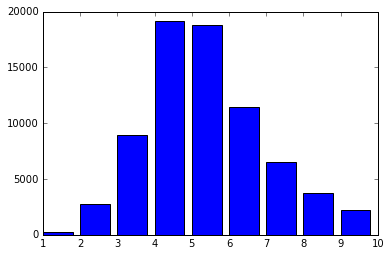

In [76]:
labels = data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().index
heights = data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().values
plt.bar(labels, heights)

In [77]:
Do_resamples(data_2000, 'FAMI_PERSONAS_HOGAR', str)

cant null antes: 3786
cant null despues: 0


In [78]:
Do_resamples(data_2000, 'IND_ANNO_TERMINO_BACHILLERATO', str)

cant null antes: 545
cant null despues: 1
cant null antes: 1
cant null despues: 0


In [79]:
Do_resamples(data_2000, 'COLE_VALOR_PENSION', int)

cant null antes: 5526
cant null despues: 1
cant null antes: 1
cant null despues: 0


In [113]:
"""In this column i found that the same rows of the ESTU_NACIMIENTO_DIA are the same rows in the ESTU_NACIMIENTO_MES/ANNO
with nan values, so that rows will be deleted"""
indexes = data_2000[data_2000['ESTU_NACIMIENTO_ANNO'].isnull()].index
data_2000 = data_2000.drop(indexes)

In [81]:
data_2000['ESTU_LIMITA_INVIDENTE'].fillna('V', inplace=True)

In [82]:
data_2000['ESTU_LIMITA_SORDONOINTERPRETE'].fillna('NS', inplace=True)

In [83]:
data_2000['ESTU_LIMITA_MOTRIZ'].fillna('NL', inplace=True)

In [84]:
data_2000['ESTU_IES_COD_DESEADA'].fillna(method='bfill', inplace=True)

In [85]:
Do_resamples(data_2000, 'ESTU_RAZONINSTITUTO', str)

cant null antes: 7840
cant null despues: 0


In [86]:
data_2000['ESTU_CARRDESEADA_COD'].fillna(method = 'bfill', inplace=True)

In [87]:
Do_resamples(data_2000, 'ESTU_CARRDESEADA_RAZON', str)

cant null antes: 5209
cant null despues: 1
cant null antes: 1
cant null despues: 0


In [88]:
Do_resamples(data_2000, 'FAMI_VIVIENDA_PROPIA', str)

cant null antes: 4300
cant null despues: 0


In [89]:
Do_resamples(data_2000, 'FAMI_DEUDA_VIVIENDA', str)

cant null antes: 30015
cant null despues: 0


In [90]:
Do_resamples(data_2000, 'FAMI_APORTANTES', str)

cant null antes: 1615
cant null despues: 0


In [91]:
Do_resamples(data_2000, 'FAMI_INGRESO_FMILIAR_MENSUAL', str)

cant null antes: 2110
cant null despues: 0


In [92]:
Do_resamples(data_2000, 'FAMI_LEE_ESCRIBE_PADRE', str)

cant null antes: 7935
cant null despues: 0


In [93]:
Do_resamples(data_2000, 'FAMI_LEE_ESCRIBE_MADRE', str)

cant null antes: 2775
cant null despues: 0


In [94]:
Do_resamples(data_2000, 'FAMI_EDUCA_PADRE', str)

cant null antes: 10274
cant null despues: 1
cant null antes: 1
cant null despues: 0


In [95]:
Do_resamples(data_2000, 'FAMI_EDUCA_MADRE', str)

cant null antes: 6482
cant null despues: 0


In [96]:
Do_resamples(data_2000, 'FAMI_OCUPA_PADRE', str)

cant null antes: 14279
cant null despues: 1
cant null antes: 1
cant null despues: 0


In [97]:
Do_resamples(data_2000, 'FAMI_OCUPA_MADRE', str)

cant null antes: 9069
cant null despues: 0


In [98]:
Do_resamples(data_2000, 'FAMI_NUM_HERMANOS', str)

cant null antes: 5608
cant null despues: 0


In [99]:
Do_resamples(data_2000, 'FAMI_NUM_HERMANOS_EDUSUPERIOR', str)

cant null antes: 9409
cant null despues: 0


In [100]:
Do_resamples(data_2000, 'FAMI_POSICION_HERMANOS', str)

cant null antes: 4784
cant null despues: 0


In [101]:
Do_resamples(data_2000, 'FAMI_SOST_PERSONAL', str)

cant null antes: 3065
cant null despues: 0


In [102]:
Do_resamples(data_2000, 'ESTU_TRABAJA', str)

cant null antes: 3792
cant null despues: 0


In [103]:
Do_resamples(data_2000, 'ESTU_ACT_PROX_ANNO', str)

cant null antes: 428
cant null despues: 0


In [104]:
Do_resamples(data_2000, 'COLE_BILINGUE', float)

cant null antes: 75292
cant null despues: 0


___________

___________

# The second file is the 2000_2 that correspond to the second period of the year.

In [ ]:
data_2000_2 = pd.read_csv("../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/SB11-20002-RGSTRO-CLFCCN-V1-0.txt", delimiter="|",
                         encoding="iso-8859-1")

In [ ]:
data_2000_2.shape

In [ ]:
data_2000_2.head(3).T

The first thing i want to do is delete the columns that does not contribute to the task

The columns that does not contribute to the task are:
- ESTU_CONSECUTIVO
- COLE_NOMBRE_SEDE
- ESTU_TIPO_DOCUMENTO

In [ ]:
data_2000_2 = data_2000_2.drop(['ESTU_CONSECUTIVO', 'COLE_NOMBRE_SEDE', 'ESTU_TIPO_DOCUMENTO'], axis=1)

Now i can check the other columns to delete the lines that has strange characters and to decide what to do with the NaN values

In [ ]:
data_2000_2.columns

In [ ]:
"""all ok"""
print(data_2000_2['COLE_COD_ICFES'].value_counts().sort_index().index)
print(data_2000_2['COLE_COD_ICFES'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_COD_ICFES']))

In [ ]:
"""There are some years that are not valid, so this lines will be deleted"""
print(data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index)
print(data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index())
print(missing_data(data_2000_2['IND_ANNO_TERMINO_BACHILLERATO']))

In [ ]:
for i in data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index:
    if "*" in i:
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif (' ' in i):
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif (len(i)<4):
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif (int(i) > 2002):
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)

In [ ]:
"""This columns looks good"""
print(data_2000_2['COLE_JORNADA'].value_counts().sort_index().index)
print(data_2000_2['COLE_JORNADA'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_JORNADA']))

In [ ]:
"""Obtained an error, this happens because of the combination of strings a numbers in just one column, so
i decide to do a first treatment"""
print(data_2000_2['COLE_VALOR_PENSION'].value_counts().index)
print(data_2000_2['COLE_VALOR_PENSION'].value_counts())
print(missing_data(data_2000_2['COLE_VALOR_PENSION']))

In [ ]:
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(1.0, '1')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(2.0, '2')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(3.0, '3')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(4.0, '4')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(5.0, '5')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(6.0, '6')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(7.0, '7')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(8.0, '8')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace('*', np.nan)

__________

In [ ]:
"""This column is ok"""
print(data_2000_2['ESTU_GENERO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_GENERO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_GENERO']))

In [ ]:
"""I get errors with this column"""
print(data_2000_2['ESTU_NACIMIENTO_DIA'].value_counts().index)
print(data_2000_2['ESTU_NACIMIENTO_DIA'].value_counts())
print(missing_data(data_2000_2['ESTU_NACIMIENTO_DIA']))

In [ ]:
"""The First step is replace the incoherences for np.nan values"""
for i in data_2000_2['ESTU_NACIMIENTO_DIA'].value_counts().index:
    if '*' in str(i):
        data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(i, np.nan)
    elif(int(i)>31):
        data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(i, np.nan)
    elif(int(i) == 0):
        data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(i, np.nan)

In [ ]:
"""Now it's time to replace the number values for string values"""
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(1.0, '01')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(2.0, '02')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(3.0, '03')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(4.0, '04')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(5.0, '05')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(6.0, '06')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(7.0, '07')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(8.0, '08')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(9.0, '09')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(10.0, '10')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(11.0, '11')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(12.0, '12')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(13.0, '13')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(14.0, '14')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(15.0, '15')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(16.0, '16')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(17.0, '17')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(18.0, '18')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(19.0, '19')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(20.0, '20')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(21.0, '21')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(22.0, '22')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(23.0, '23')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(24.0, '24')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(25.0, '25')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(26.0, '26')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(27.0, '27')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(28.0, '28')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(29.0, '29')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(30.0, '30')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(31.0, '31')

"""And Finally a change some values to left everything in just one way"""
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('1', '01')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('5', '05')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('3', '03')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('7', '07')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('4', '04')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('6', '06')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('8', '08')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('2', '02')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('9', '09')

___

In [ ]:
"""This column is OK, in this column exist 1078 np.nan, but as they are numpy dtype, i will let this column like it's
in this moment"""
print(data_2000_2['ESTU_NACIMIENTO_MES'].value_counts().sort_index().index)
print(data_2000_2['ESTU_NACIMIENTO_MES'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_NACIMIENTO_MES']))

In [ ]:
"""This column present A LOT of incoherences."""
print(data_2000_2['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_NACIMIENTO_ANNO']))

In [ ]:
"""So, the first thing i have to do is replace the incoherent values with a string NaN"""
for i in data_2000_2['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index:
    if '*' in i:
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(' ' in i):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(len(i)<4):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(int(i)>2002):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(int(i)<1900):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)

In [ ]:
"""This Column looks OK, just has one np.nan value, that i will replace immediately."""
print(data_2000_2['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index().index)
print(data_2000_2['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_DEPTO_PRESENTACION']))

In [ ]:
"""Checked. Looks OK, but has one np.nan value that will be replaced immediately"""
print(data_2000_2['ESTU_MCPIO_PRESENTACION'].value_counts().sort_index().index)
print(data_2000_2['ESTU_MCPIO_PRESENTACION'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_MCPIO_PRESENTACION']))

In [ ]:
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('1', '01')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('2', '02')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('3', '03')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('4', '04')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('5', '05')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('6', '06')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('7', '07')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('8', '08')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('9', '09')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(99.0, '99')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(1.0, '01')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(2.0, '02')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(3.0, '03')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(4.0, '04')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(5.0, '05')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(6.0, '06')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(7.0, '07')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(8.0, '08')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(9.0, '09')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('*', np.nan)

"""And now it's ready"""

In [ ]:
"""Even if this column has to many NaN values, is OK, in the encode process that NaN values will be -1"""
print(data_2000_2['ESTU_LIMITA_INVIDENTE'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_INVIDENTE'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_LIMITA_INVIDENTE']))

In [ ]:
"""This column does not have any row with a value so this column will be deleted."""
print(data_2000_2['ESTU_LIMITA_SORDOINTERPRETE'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_SORDOINTERPRETE'].value_counts().sort_index())

In [ ]:
"""Deleting..."""
data_2000_2.drop('ESTU_LIMITA_SORDOINTERPRETE', axis=1, inplace=True)
"""Deleted"""

In [ ]:
"""Even if this column has to many NaN values, is OK, in the encode process that NaN values will be -1"""
print(data_2000_2['ESTU_LIMITA_SORDONOINTERPRETE'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_SORDONOINTERPRETE'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_LIMITA_SORDONOINTERPRETE']))

In [ ]:
"""Even if this column has to many NaN values, is OK, in the encode process that NaN values will be -1"""
print(data_2000_2['ESTU_LIMITA_MOTRIZ'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_MOTRIZ'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_LIMITA_MOTRIZ']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_BIOLOGIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_BIOLOGIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_BIOLOGIA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_FILOSOFIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_FILOSOFIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_FILOSOFIA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_FISICA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_FISICA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_FISICA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_HISTORIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_HISTORIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_HISTORIA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_QUIMICA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_QUIMICA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_QUIMICA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_LENGUAJE'].value_counts().sort_index().index)
print(data_2000_2['PUNT_LENGUAJE'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_LENGUAJE']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_GEOGRAFIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_GEOGRAFIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_GEOGRAFIA']))

In [ ]:
"""This column Looks OK"""
print(data_2000_2['COD_INTERDISCIPLINAR'].value_counts().sort_index().index)
print(data_2000_2['COD_INTERDISCIPLINAR'].value_counts().sort_index())
print(missing_data(data_2000_2['COD_INTERDISCIPLINAR']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_INTERDISCIPLINAR'].value_counts().sort_index().index)
print(data_2000_2['PUNT_INTERDISCIPLINAR'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_INTERDISCIPLINAR']))

In [ ]:
"""This column loooks OK"""
print(data_2000_2['COD_IDIOMA'].value_counts().sort_index().index)
print(data_2000_2['COD_IDIOMA'].value_counts().sort_index())
print(missing_data(data_2000_2['COD_IDIOMA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_IDIOMA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_IDIOMA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_IDIOMA']))

In [ ]:
"""This column has a lot of incoherences, this incoherences will be replaced for NaN"""
print(data_2000_2['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index)
print(data_2000_2['ESTU_IES_COD_DESEADA'].value_counts().sort_index())

In [ ]:
"""The codes of the universities are of 4 digits, so i will replace the codes that has some '*', or space (' '), or that has more
or less than 4 digits"""
for i in data_2000_2['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index:
    if '*' in i:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif ' ' in i:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)<4:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)>4:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)

In [ ]:
"""Looks OK, just replace the * values for np.nan"""
print(data_2000_2['ESTU_RAZONINSTITUTO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_RAZONINSTITUTO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_RAZONINSTITUTO']))

In [ ]:
"""Will be replace for '*' values"""
data_2000_2['ESTU_RAZONINSTITUTO'] = data_2000_2['ESTU_RAZONINSTITUTO'].replace('*', np.nan)

In [ ]:
"""Into this column i found a LOT of incoherences."""
print(data_2000_2['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index)
print(data_2000_2['ESTU_CARRDESEADA_COD'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_CARRDESEADA_COD']))

In [ ]:
"""Here i'm replacing the values with anomalies for NaN, and i will let the rows that has got any number because the 
codes of the programs are so diverse. And then i will put NaN where the values has some space or np.nan"""
for i in data_2000_2['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index:
    if '*' in i:
        data_2000_2['ESTU_CARRDESEADA_COD'] = data_2000_2['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    elif(' ' in i):
        data_2000_2['ESTU_CARRDESEADA_COD'] = data_2000_2['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    #And i decided to replace the code 0 or 00... for 'NaN' because there is no program with that code
    elif int(i)==0:
        data_2000_2['ESTU_CARRDESEADA_COD'] = data_2000_2['ESTU_CARRDESEADA_COD'].replace(i, np.nan)

In [ ]:
"""In this column i found just an incoherence with the * values"""
print(data_2000_2['ESTU_CARRDESEADA_RAZON'].value_counts().sort_index().index)
print(data_2000_2['ESTU_CARRDESEADA_RAZON'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_CARRDESEADA_RAZON']))

In [ ]:
"""The changes are done here."""
data_2000_2['ESTU_CARRDESEADA_RAZON'] = data_2000_2['ESTU_CARRDESEADA_RAZON'].replace('*', np.nan)

In [ ]:
"""Incoherences with the * and the + values. I decide to let the + values as +9 human being in home,
and the * as NaN"""
print(data_2000_2['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().index)
print(data_2000_2['FAMI_PERSONAS_HOGAR'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_PERSONAS_HOGAR']))

In [ ]:
data_2000_2['FAMI_PERSONAS_HOGAR'] = data_2000_2['FAMI_PERSONAS_HOGAR'].replace('*', np.nan)
data_2000_2['FAMI_PERSONAS_HOGAR'] = data_2000_2['FAMI_PERSONAS_HOGAR'].replace('+', '+9')

In [ ]:
"""Has got some * values, this values will be replaced for NaN"""
print(data_2000_2['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index().index)
print(data_2000_2['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_VIVIENDA_PROPIA']))

In [ ]:
data_2000_2['FAMI_VIVIENDA_PROPIA'] = data_2000_2['FAMI_VIVIENDA_PROPIA'].replace('*', np.nan)

In [ ]:
"""This column must be like a boolean, with just two values (S/N) but it has four different values, so i decided to
replace the * values for NaN, and replace the 1 for S, and the 2 for N because of the amounts,"""
print(data_2000_2['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index().index)
print(data_2000_2['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_DEUDA_VIVIENDA']))

In [ ]:
data_2000_2['FAMI_DEUDA_VIVIENDA'] = data_2000_2['FAMI_DEUDA_VIVIENDA'].replace('*', np.nan)
data_2000_2['FAMI_DEUDA_VIVIENDA'] = data_2000_2['FAMI_DEUDA_VIVIENDA'].replace('1', 'S')
data_2000_2['FAMI_DEUDA_VIVIENDA'] = data_2000_2['FAMI_DEUDA_VIVIENDA'].replace('2', 'N')

In [ ]:
"""I really don't know what means the 0..."""
print(data_2000_2['FAMI_APORTANTES'].value_counts().sort_index().index)
print(data_2000_2['FAMI_APORTANTES'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_APORTANTES']))

In [ ]:
"""The 0 counts, so i will replace the simbol + for '+9' and '*' for 'NaN'"""
data_2000_2['FAMI_APORTANTES'] = data_2000_2['FAMI_APORTANTES'].replace('+', '+9')
data_2000_2['FAMI_APORTANTES'] = data_2000_2['FAMI_APORTANTES'].replace('*', np.nan)

In [ ]:
"""In this column there is some '*' that will be replaced for 'NaN' and the np.nan too"""
print(data_2000_2['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index().index)
print(data_2000_2['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_INGRESO_FMILIAR_MENSUAL']))

In [ ]:
data_2000_2['FAMI_APORTANTES'] = data_2000_2['FAMI_APORTANTES'].replace('*', np.nan)

In [ ]:
"""Here the '*' will be replaced for 'NaN' and the np.nan too"""
print(data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_LEE_ESCRIBE_PADRE']))

In [ ]:
data_2000_2['FAMI_LEE_ESCRIBE_PADRE'] = data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].replace('*', np.nan)

In [ ]:
"""Here the '*' will be replaced for 'NaN' and the np.nan too"""
print(data_2000_2['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_LEE_ESCRIBE_MADRE']))

In [ ]:
data_2000_2['FAMI_LEE_ESCRIBE_PADRE'] = data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].replace('*', np.nan)

In [ ]:
"""Here the same treatment, but the 9 will be replaced for 'NaN' too"""
print(data_2000_2['FAMI_EDUCA_PADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_EDUCA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_EDUCA_PADRE']))

In [ ]:
data_2000_2['FAMI_EDUCA_PADRE'] = data_2000_2['FAMI_EDUCA_PADRE'].replace('9', np.nan)
data_2000_2['FAMI_EDUCA_PADRE'] = data_2000_2['FAMI_EDUCA_PADRE'].replace('*', np.nan)

In [ ]:
"""The same treatment"""
print(data_2000_2['FAMI_EDUCA_MADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_EDUCA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_EDUCA_MADRE']))

In [ ]:
data_2000_2['FAMI_EDUCA_MADRE'] = data_2000_2['FAMI_EDUCA_MADRE'].replace('*', np.nan)

In [ ]:
"""The '*' will be replaced for 'NaN' and the number with just 1 character will be replaced for themselves but with 
one 0 before (ex: 3->03)"""
print(data_2000_2['FAMI_OCUPA_PADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_OCUPA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_OCUPA_PADRE']))

In [ ]:
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('0', '00')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('2', '02')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('3', '03')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('5', '05')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('6', '06')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('8', '08')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('9', '09')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('*', np.nan)

In [ ]:
"""Same treatment that the last one"""
print(data_2000_2['FAMI_OCUPA_MADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_OCUPA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_OCUPA_MADRE']))

In [ ]:
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('0', '00')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('1', '01')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('2', '02')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('5', '05')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('6', '06')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('8', '08')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('9', '09')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('*', np.nan)

In [ ]:
"""The simbol '+' will be replaced for '+9' and the '*' and the np.nan will be replaced for 'NaN'."""
print(data_2000_2['FAMI_NUM_HERMANOS'].value_counts().sort_index().index)
print(data_2000_2['FAMI_NUM_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_NUM_HERMANOS']))

In [ ]:
data_2000_2['FAMI_NUM_HERMANOS'] = data_2000_2['FAMI_NUM_HERMANOS'].replace('+', '+9')
data_2000_2['FAMI_NUM_HERMANOS'] = data_2000_2['FAMI_NUM_HERMANOS'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index().index)
print(data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR']))

In [ ]:
data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('+', '+9')
data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['FAMI_POSICION_HERMANOS'].value_counts().sort_index().index)
print(data_2000_2['FAMI_POSICION_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_POSICION_HERMANOS']))

In [ ]:
data_2000_2['FAMI_POSICION_HERMANOS'] = data_2000_2['FAMI_POSICION_HERMANOS'].replace('+', '+9')
data_2000_2['FAMI_POSICION_HERMANOS'] = data_2000_2['FAMI_POSICION_HERMANOS'].replace('*', np.nan)

In [ ]:
"""Put NaN where '*' or np.nan"""
print(data_2000_2['FAMI_SOST_PERSONAL'].value_counts().sort_index().index)
print(data_2000_2['FAMI_SOST_PERSONAL'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_SOST_PERSONAL']))

In [ ]:
data_2000_2['FAMI_SOST_PERSONAL'] = data_2000_2['FAMI_SOST_PERSONAL'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['ESTU_TRABAJA'].value_counts().sort_index().index)
print(data_2000_2['ESTU_TRABAJA'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_TRABAJA']))

In [ ]:
data_2000_2['ESTU_TRABAJA'] = data_2000_2['ESTU_TRABAJA'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['ESTU_ACT_PROX_ANNO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_ACT_PROX_ANNO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_ACT_PROX_ANNO']))

In [ ]:
data_2000_2['ESTU_ACT_PROX_ANNO'] = data_2000_2['ESTU_ACT_PROX_ANNO'].replace('*', np.nan)

In [ ]:
"""just change the np.nan value for 'NaN'"""
print(data_2000_2['COLE_CALENDARIO'].value_counts().sort_index().index)
print(data_2000_2['COLE_CALENDARIO'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_CALENDARIO']))

In [ ]:
"""This column will stand like it is at this moment"""
print(data_2000_2['COLE_BILINGUE'].value_counts().sort_index().index)
print(data_2000_2['COLE_BILINGUE'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_BILINGUE']))

In [ ]:
"""Just will change the np.nan value for a 'NaN'"""
print(data_2000_2['COLE_CARACTER'].value_counts().sort_index().index)
print(data_2000_2['COLE_CARACTER'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_CARACTER']))

In [ ]:
"""Just will change the np.nan value for a 'NaN'"""
print(data_2000_2['COLE_DEPTO_UBICACION'].value_counts().sort_index().index)
print(data_2000_2['COLE_DEPTO_UBICACION'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_DEPTO_UBICACION']))

In [ ]:
"""Just chage the np.nan value for a 'NaN'"""
print(data_2000_2['COLE_MCPIO_UBICACION'].value_counts().sort_index().index)
print(data_2000_2['COLE_MCPIO_UBICACION'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_MCPIO_UBICACION']))

In [ ]:
"""the same that the last one"""
print(data_2000_2['ESTU_RESIDE_DEPTO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_RESIDE_DEPTO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_RESIDE_DEPTO']))

In [ ]:
"""The same that the last one"""
print(data_2000_2['ESTU_RESIDE_MCPIO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_RESIDE_MCPIO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_RESIDE_MCPIO']))

# The Last Step is save the obtained DataFrames as Files

In [115]:
data_2000.to_csv('../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', sep=';', index = False)
data_2000_2.to_csv('../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_2.csv', sep=';', index = False)